In [121]:
# Se importan paquetes de análisis de datos- Proceso

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Se importa base de plan de ventas fusión Agro - Proceso

Plan2022 = pd.read_csv("1.csv")

Precios = pd.read_csv("2.csv")

Costos = pd.read_csv("4.csv")

Plan2022_ = pd.read_csv("5.csv")

BaseVentasFusionAgro = pd.read_csv("11.csv")

# Se importan categorías de producto, cultivo y cliente

Zona = pd.read_csv("Zona.csv")

Producto = pd.read_csv("Producto.csv")

Cultivo = pd.read_csv("Cultivo.csv")

Mesatrimestre = pd.read_csv("Mesatrimestre.csv")

# A qué categorías pertenece cada producto


Producto_ = Producto.groupby(['Administracion de la categoria','H1 o H2 o Resto','Producto_Ranking']).agg({'Producto_': 'count'})

# A qué zonas pertenece cada cliente


Zona_ = Zona.groupby(['Empresa','Zona','RM/ REIQ']).agg({'RM/ REIQ': 'count'})


# A qué zonas pertenece cada cliente


Cultivos= Cultivo[(Cultivo['Cultivo_Categoría'] != "-") & (Cultivo['Cultivo_Categoría'] != "Otros")]

Cultivo_ = Cultivos.groupby(['Cultivo_Macrocategoría','Cultivo_Categoría','Cultivo_']).agg({'Cultivo_': 'count'})


# Se incluyen las categorías en la base


Ventas_zona = BaseVentasFusionAgro.merge(Zona, how='left', left_on='RM/ REIQ', right_on='RM/ REIQ_')

Ventas_zona_producto = Ventas_zona.merge(Producto, how='left', left_on='Producto_', right_on='Producto_')

Ventas_zona_producto_ = Ventas_zona_producto.merge(Mesatrimestre, how='left', left_on='Mes', right_on='Mes')

Ventas_zona_producto_cultivo = Ventas_zona_producto_.merge(Cultivo, how='left', left_on='Cultivo_', right_on='Cultivo', indicator = True)


#Criterios para filtrar datos

Periodoconsiderado_2022 = Ventas_zona_producto_cultivo['Periodo'] == 2022
Periodoconsiderado2021 = Ventas_zona_producto_cultivo['Periodo'] == 2021
Periodoconsiderado2020 = Ventas_zona_producto_cultivo['Periodo'] == 2020
Zonaconsiderada_Noroeste = Ventas_zona_producto_cultivo['Zona Ranking_'] == "01 Noroeste"
ZonaconsideradaZona2 = Ventas_zona_producto_cultivo['Zona Ranking_'] == "03 Zona 2"
ZonaconsideradaPacífico = Ventas_zona_producto_cultivo['Zona Ranking_'] == "02 Pacífico"
EmpresaconsideradaMéxico = Ventas_zona_producto_cultivo ['Empresa'] == "México"
EmpresaconsideradaNOesMéxico = Ventas_zona_producto_cultivo ['Empresa'] != "México"

T1 = ['T1']
T1yT2 = ['T1', 'T2']
T1aT4 = ['T1', 'T2','T3', 'T4']
Catdecultivo = Ventas_zona_producto_cultivo['Cultivo_Categoría'] == "Hortalizas"
AdmCat_Cito = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "1 Cito"
AdmCat_Suelo = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "2 Raiz/ suelo"
AdmCat_Bioest = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "3 Bioestimulante"
AdmCat_Coady = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "4 Coadyuvante"
H2 = Ventas_zona_producto_cultivo['H1 o H2 o Resto'] == "H2"

# Plan 2022 corresponde al año 2022, también es posible seleccionar 2020 o 2021

Ventas_zona_producto_cultivo_2021 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado2021]

Ventas_zona_producto_cultivo_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022]

Ventas_zona_producto_cultivo_Cito_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022  &
    AdmCat_Cito]
Ventas_zona_producto_cultivo_Suelo_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 &
    AdmCat_Suelo]
Ventas_zona_producto_cultivo_Bioest_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 &
    AdmCat_Bioest]
Ventas_zona_producto_cultivo_Coady_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 &
    AdmCat_Coady]

CitoMx = Ventas_zona_producto_cultivo[Periodoconsiderado_2022 & 
                                      EmpresaconsideradaMéxico &
                                      AdmCat_Cito]
CitoIntnl = Ventas_zona_producto_cultivo[Periodoconsiderado_2022 &
                                         EmpresaconsideradaNOesMéxico &
                                         AdmCat_Cito]
SueloMx = Ventas_zona_producto_cultivo[Periodoconsiderado_2022 &
                                       EmpresaconsideradaMéxico &
                                       AdmCat_Suelo]
SueloIntnl = Ventas_zona_producto_cultivo[Periodoconsiderado_2022 &
                                          EmpresaconsideradaNOesMéxico &
                                          AdmCat_Suelo]
BioestMx = Ventas_zona_producto_cultivo[Periodoconsiderado_2022 &
                                        EmpresaconsideradaMéxico &
                                        AdmCat_Bioest]
BioestIntnl = Ventas_zona_producto_cultivo[Periodoconsiderado_2022 &
                                           EmpresaconsideradaNOesMéxico &
                                           AdmCat_Bioest]



# Análisis del primer trimestre de Base de ventas Fusión Agro

# Utilidad Fusión Agro por zona y por año 

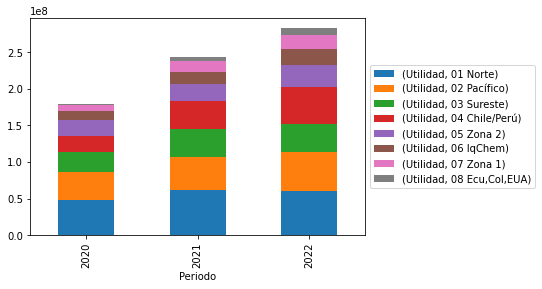

In [122]:
UZA = Ventas_zona_producto_cultivo.groupby(['Periodo','Zona_Ranking']).agg({'Utilidad': 'sum'}).reset_index()
UZA_ = Ventas_zona_producto_cultivo.groupby(['Periodo','Zona_Ranking']).agg({'Utilidad': 'sum'})
UZA_df = pd.DataFrame(UZA_.unstack(level = 1))
UZA_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [123]:
UZA2 = Ventas_zona_producto_cultivo.groupby(['Periodo']).agg({'Utilidad': 'sum'})
UZA2.head(20)

,Utilidad
Periodo,
2020,1.793428e+08
2021,2.437687e+08
2022,2.827465e+08


# Utilidad Fusión Agro 

In [124]:
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/1000000) )

$73.946 M


# Crecimiento respecto al 2021

In [125]:
print ('{:,.2f} %'.format(
                            ((Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/
                            Ventas_zona_producto_cultivo_2021['Utilidad'].sum())-1)*100
                        )) 

20.31 %


 # Desglose por zona y por categoría

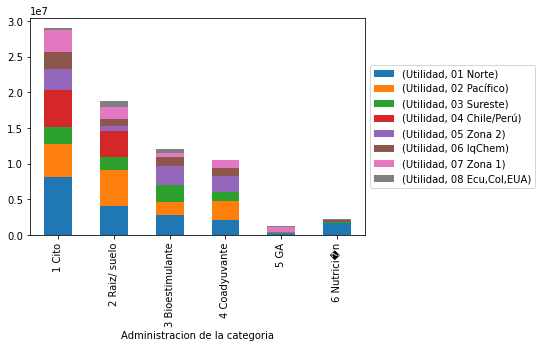

In [126]:
RCZ = Ventas_zona_producto_cultivo_2022.groupby(['Administracion de la categoria','Zona_Ranking']).agg({'Utilidad': 'sum'}).reset_index()
RCZ_ = Ventas_zona_producto_cultivo_2022.groupby(['Administracion de la categoria','Zona_Ranking']).agg({'Utilidad': 'sum'})
RCZ_df = pd.DataFrame(RCZ_.unstack(level = 1))
RCZ_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [127]:
RCZ2 = Ventas_zona_producto_cultivo_2022.groupby(['Administracion de la categoria']).agg({'Utilidad': 'sum'})
RCZ2.head(20)

,Utilidad
Administracion de la categoria,
1 Cito,2.904446e+07
2 Raiz/ suelo,1.885172e+07
3 Bioestimulante,1.203039e+07
4 Coadyuvante,1.058073e+07
5 GA,1.239757e+06
6 Nutrici�n,2.198556e+06


# Desglose por zona y por horizonte

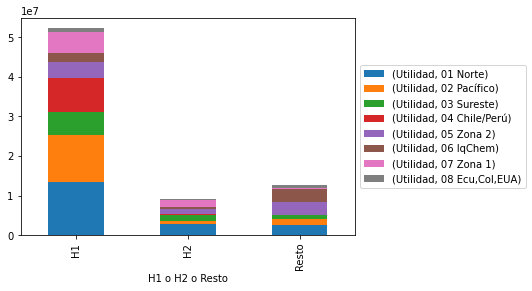

In [128]:
RCZ_H = Ventas_zona_producto_cultivo_2022.groupby(['H1 o H2 o Resto','Zona_Ranking']).agg({'Utilidad': 'sum'}).reset_index()
RCZ__H = Ventas_zona_producto_cultivo_2022.groupby(['H1 o H2 o Resto','Zona_Ranking']).agg({'Utilidad': 'sum'})
RCZ_df_H = pd.DataFrame(RCZ__H.unstack(level = 1))
RCZ_df_H.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [129]:
RCZ_H2 = Ventas_zona_producto_cultivo_2022.groupby(['H1 o H2 o Resto']).agg({'Utilidad': 'sum'})
RCZ_H2.head(20)

,Utilidad
H1 o H2 o Resto,
H1,5.231811e+07
H2,9.030466e+06
Resto,1.259704e+07


# Top 20 prioridades en todo Fusión Agro

In [130]:
Detalle2022 = Ventas_zona_producto_cultivo_2022.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking','Administracion de la categoria']).agg({'Utilidad': 'sum'})
Detalle2022_sorted = Detalle2022.sort_values(by=['Utilidad'],ascending=False)
Detalle2022_sorted.head(20)

Utilidad
Cultivo_Categoría_Ranking  Zona_Ranking  Administracion de la categoria              
04 Vides                   01 Norte      1 Cito                          5.201897e+06
                           04 Chile/Perú 1 Cito                          5.138181e+06
05 Berries                 02 Pacífico   2 Raiz/ suelo                   2.441932e+06
                                         1 Cito                          2.417092e+06
02 Frutales siempre verdes 05 Zona 2     3 Bioestimulante                2.353494e+06
06 Granos                  05 Zona 2     1 Cito                          2.134339e+06
03 Hortalizas              01 Norte      2 Raiz/ suelo                   1.927666e+06
02 Frutales siempre verdes 05 Zona 2     4 Coadyuvante                   1.927613e+06
04 Vides                   04 Chile/Perú 2 Raiz/ suelo                   1.819498e+06
03 Hortalizas              01 Norte      1 Cito                          1.789719e+06
                                         4 Coadyuvante                   1.606711e+06
02 Frutales siempre verdes 02 Pacífico   2 Raiz/ suelo                   1.375694e+06
04 Vides                   01 Norte      3 Bioestimulante                1.346029e+06
05 Berries                 02 Pacífico   4 Coadyuvante                   1.321693e+06
02 Frutales siempre verdes 03 Sureste    3 Bioestimulante                1.307618e+06
03 Hortalizas              02 Pacífico   1 Cito                          1.290194e+06
                           06 IqChem     1 Cito                          1.174007e+06
02 Frutales siempre verdes 07 Zona 1     1 Cito                          1.085731e+06
03 Hortalizas              02 Pacífico   2 Raiz/ suelo                   9.959883e+05
02 Frutales siempre verdes 02 Pacífico   1 Cito                          9.358669e+05

In [131]:
print ('${:,.3f} M'.format(Detalle2022_sorted['Utilidad'].head(20).sum()/1000000) )


$39.591 M


# Análisis por categoría

# Cito, 2022

# Valor de Cito y lo que representa respecto a utilidad total

In [132]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadcito2022 = Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()
utilidadcito2022/ utilidadtotal2022
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadcito2022*100/ utilidadtotal2022))


$29.044 M
39.3 %


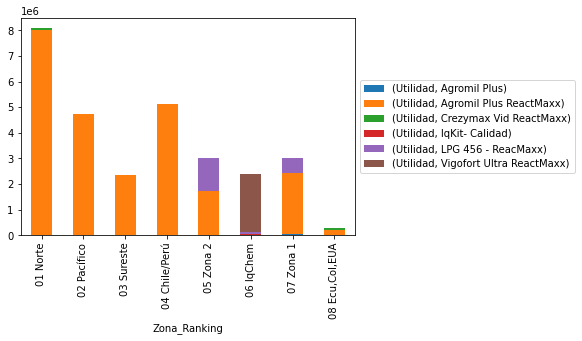

In [133]:
ResumenporHorizonteyEmp = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_ = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_df = pd.DataFrame(ResumenporHorizonteyEmp_.unstack(level = 1))
ResumenporHorizonteyEmp_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [134]:
Ventas_zona_Cito_2022 = ResumenporHorizonteyEmp.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Cito_2022_sorted = Ventas_zona_Cito_2022.sort_values(by=['Utilidad'],ascending=False)
Ventas_zona_Cito_2022_sorted.head(20)

,Utilidad
Zona_Ranking,
01 Norte,8.078157e+06
04 Chile/Perú,5.138181e+06
02 Pacífico,4.728097e+06
05 Zona 2,3.023839e+06
07 Zona 1,3.016689e+06
06 IqChem,2.399674e+06
03 Sureste,2.366729e+06
"08 Ecu,Col,EUA",2.930971e+05


# Top 10

In [135]:
DetalleCito2022 = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Cultivo_Categoría','Zona_Ranking']).agg({'Utilidad': 'sum'})
DetalleCito2022_sorted = DetalleCito2022.sort_values(by=['Utilidad'],ascending=False)
DetalleCito2022_sorted.head(10)


Utilidad
Cultivo_Categoría       Zona_Ranking               
Vides                   01 Norte       5.201897e+06
                        04 Chile/Perú  5.138181e+06
Berries                 02 Pacífico    2.417092e+06
Granos                  05 Zona 2      2.134339e+06
Hortalizas              01 Norte       1.789719e+06
                        02 Pacífico    1.290194e+06
                        06 IqChem      1.174007e+06
Frutales siempre verdes 07 Zona 1      1.085731e+06
                        02 Pacífico    9.358669e+05
                        03 Sureste     8.940348e+05

In [136]:
print('${:,.3f} M'.format(DetalleCito2022_sorted['Utilidad'].head(10).sum()/1000000))

$22.061 M


# Raíz/ Suelo, 2022

# Valor de RaízSuelo y lo que representa respecto a utilidad total

In [137]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadsuelo2022 = Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadsuelo2022*100/ utilidadtotal2022))


$18.852 M
25.5 %


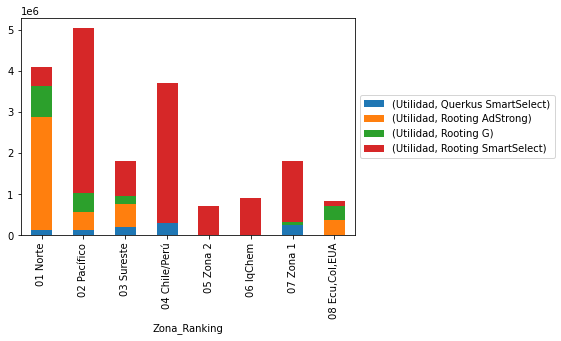

In [138]:
ResumenporHorizonteyEmp_Suelo = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Suelo_ = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_Suelo_df = pd.DataFrame(ResumenporHorizonteyEmp_Suelo_.unstack(level = 1))
ResumenporHorizonteyEmp_Suelo_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [139]:
Ventas_zona_Suelo_2022 = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Suelo_2022.head(20)

,Utilidad
Zona_Ranking,
01 Norte,4.085168e+06
02 Pacífico,5.036447e+06
03 Sureste,1.801147e+06
04 Chile/Perú,3.697593e+06
05 Zona 2,7.070623e+05
06 IqChem,8.982571e+05
07 Zona 1,1.800440e+06
"08 Ecu,Col,EUA",8.256047e+05


# Top 10 

In [140]:
DetalleSuelo2022 = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Cultivo_Categoría','Zona_Ranking']).agg({'Utilidad': 'sum'})
DetalleSuelo2022_sorted = DetalleSuelo2022.sort_values(by=['Utilidad'],ascending=False)
DetalleSuelo2022_sorted.head(10)

,,Utilidad
Cultivo_Categoría,Zona_Ranking,
Berries,02 Pacífico,2.441932e+06
Hortalizas,01 Norte,1.927666e+06
Vides,04 Chile/Perú,1.819498e+06
Frutales siempre verdes,02 Pacífico,1.375694e+06
Hortalizas,02 Pacífico,9.959883e+05
Frutales siempre verdes,07 Zona 1,7.713685e+05
Granos,01 Norte,7.446382e+05
Hortalizas,03 Sureste,7.369814e+05
Vides,01 Norte,7.231719e+05


In [141]:
print('${:,.3f} M'.format(DetalleSuelo2022_sorted['Utilidad'].head(10).sum()/1000000))

$12.207 M


# Bioestimulante, 2022

# Valor de Bioestimulante y lo que representa respecto a utilidad total

In [142]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadbioest2022 = Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadbioest2022*100/ utilidadtotal2022))


$12.030 M
16.3 %


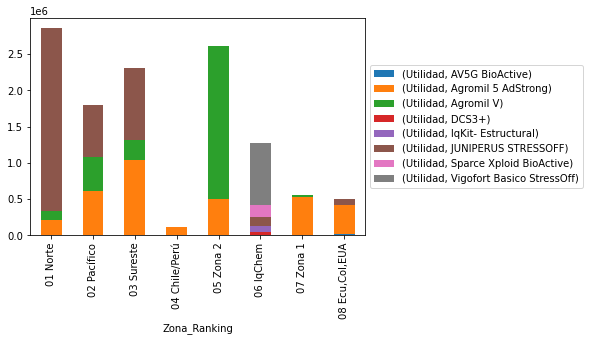

In [143]:
ResumenporHorizonteyEmp_Bioest = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Bioest_ = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_Bioest_df = pd.DataFrame(ResumenporHorizonteyEmp_Bioest_.unstack(level = 1))
ResumenporHorizonteyEmp_Bioest_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [144]:
Ventas_zona_Bioest_2022 = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Bioest_2022.head(20)

,Utilidad
Zona_Ranking,
01 Norte,2.854904e+06
02 Pacífico,1.801548e+06
03 Sureste,2.310132e+06
04 Chile/Perú,1.112511e+05
05 Zona 2,2.616822e+06
06 IqChem,1.274876e+06
07 Zona 1,5.583677e+05
"08 Ecu,Col,EUA",5.024850e+05


# Top 10 

In [145]:
DetalleBioest2022 = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Cultivo_Categoría','Zona_Ranking']).agg({'Utilidad': 'sum'})
DetalleBioest2022_sorted = DetalleBioest2022.sort_values(by=['Utilidad'],ascending=False)
DetalleBioest2022_sorted.head(10)

Utilidad
Cultivo_Categoría       Zona_Ranking              
Frutales siempre verdes 05 Zona 2     2.353494e+06
Vides                   01 Norte      1.346029e+06
Frutales siempre verdes 03 Sureste    1.307618e+06
                        06 IqChem     7.678785e+05
Hortalizas              02 Pacífico   7.605819e+05
Cucurbitácea            01 Norte      6.534636e+05
Frutales siempre verdes 02 Pacífico   6.227441e+05
Hortalizas              01 Norte      5.938536e+05
Industriales            03 Sureste    3.722083e+05
Hortalizas              03 Sureste    3.148482e+05

In [146]:
print('${:,.3f} M'.format(DetalleBioest2022_sorted['Utilidad'].head(10).sum()/1000000))

$9.093 M


# Coady 2022

# Valor de Coadyuvante y lo que  representa respecto a utilidad total 

In [147]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadcoady2022 = Ventas_zona_producto_cultivo_Coady_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Coady_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadcoady2022*100/ utilidadtotal2022))

$10.581 M
14.3 %


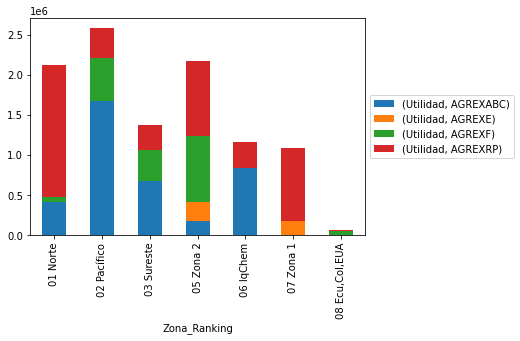

In [148]:
ResumenporHorizonteyEmp_Coady = Ventas_zona_producto_cultivo_Coady_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Coady_ = Ventas_zona_producto_cultivo_Coady_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_Coady_df = pd.DataFrame(ResumenporHorizonteyEmp_Coady_.unstack(level = 1))
ResumenporHorizonteyEmp_Coady_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [149]:
Ventas_zona_Coady_2022 = Ventas_zona_producto_cultivo_Coady_2022.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Coady_2022.head(20)

,Utilidad
Zona_Ranking,
01 Norte,2.129697e+06
02 Pacífico,2.582261e+06
03 Sureste,1.374562e+06
05 Zona 2,2.171987e+06
06 IqChem,1.163459e+06
07 Zona 1,1.085841e+06
"08 Ecu,Col,EUA",7.292258e+04


# Análisis Mx vs "Internacional"

# Cito en México, 2022


In [150]:
print ('${:,.3f} M'.format(CitoMx['Utilidad'].sum()/1000000) )


$56.772 M


<AxesSubplot:xlabel='Cultivo_Categoría_Ranking'>

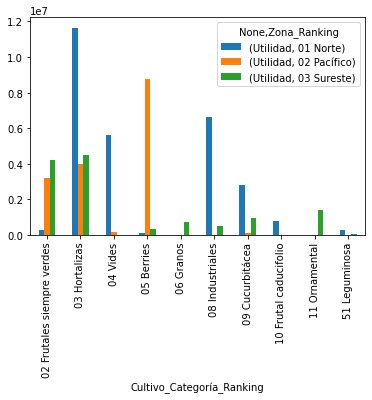

In [151]:
ResumenporCultyZona_CitoMx = CitoMx.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_CitoMx_df = pd.DataFrame(ResumenporCultyZona_CitoMx.unstack(level = 1))
ResumenporCultyZona_CitoMx_df.plot(kind = 'bar')

In [152]:
ResumenporCultyZona_CitoMx2 = CitoMx.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_CitoMx2.head(20)

,Utilidad
Cultivo_Categoría_Ranking,
02 Frutales siempre verdes,7.614530e+06
03 Hortalizas,2.011865e+07
04 Vides,5.767548e+06
05 Berries,9.181705e+06
06 Granos,7.186166e+05
08 Industriales,7.085272e+06
09 Cucurbitácea,3.798479e+06
10 Frutal caducifolio,7.810223e+05
11 Ornamental,1.382509e+06


# Cito en demás empresas

In [153]:
print ('${:,.3f} M'.format(CitoIntnl['Utilidad'].sum()/1000000) )

$63.060 M


<AxesSubplot:xlabel='Cultivo_Categoría_Ranking'>

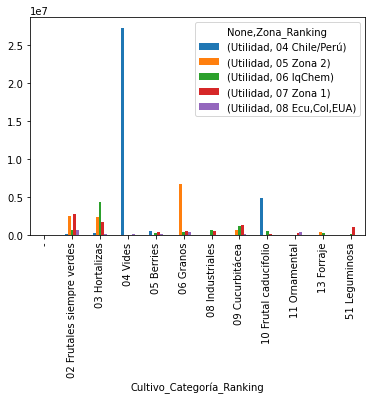

In [154]:
ResumenporCultyZona_CitoIntnl = CitoIntnl.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_CitoIntnl_df = pd.DataFrame(ResumenporCultyZona_CitoIntnl.unstack(level = 1))
ResumenporCultyZona_CitoIntnl_df.plot(kind = 'bar')

In [155]:
ResumenporCultyZona_CitoIntnl2 = CitoIntnl.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_CitoIntnl2.head(20)

,Utilidad
Cultivo_Categoría_Ranking,
-,7.451368e+03
02 Frutales siempre verdes,6.519710e+06
03 Hortalizas,8.522047e+06
04 Vides,2.746191e+07
05 Berries,1.108053e+06
06 Granos,7.770204e+06
08 Industriales,1.060123e+06
09 Cucurbitácea,3.005938e+06
10 Frutal caducifolio,5.380387e+06


# Top 10 en México 

In [156]:
ResumenporCultyZona_CitoMx_detalle = CitoMx.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})

In [157]:
ResumenporCultyZona_CitoIntnl_detalle = CitoIntnl.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})

In [158]:
ResumenporCultyZona_CitoMx_detalle_sorted = ResumenporCultyZona_CitoMx_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_CitoMx_detalle_sorted.head(10)

Utilidad
Cultivo_Categoría       RM/ REIQ_x              
Hortalizas              Quinval     7.318580e+06
Berries                 JF          7.130747e+06
Industriales            Dysea       6.610754e+06
Vides                   Ditecosa    5.568708e+06
Hortalizas              Dysea       3.173162e+06
                        Ciba        2.924993e+06
Frutales siempre verdes Fv          2.909872e+06
                        AACSA       2.370329e+06
Cucurbitácea            Ditecosa    2.243053e+06
Hortalizas              Hormonas    1.994557e+06

In [159]:
print ('${:,.3f} M'.format(ResumenporCultyZona_CitoMx_detalle['Utilidad'].sum()/1000000) )

$56.772 M


# Top 10 en otros países

In [160]:
ResumenporCultyZona_CitoIntnl_detalle_sorted = ResumenporCultyZona_CitoIntnl_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_CitoIntnl_detalle_sorted.head(10)

Utilidad
Cultivo_Categoría       RM/ REIQ_x                   
Vides                   Drokasa          1.284545e+07
                        GMT              7.678691e+06
                        Tattersal        6.840204e+06
Granos                  Empresas Melo    6.231077e+06
Frutal caducifolio      GMT              4.415932e+06
Hortalizas              Txao             2.136014e+06
Frutales siempre verdes Agricola Piscis  2.089583e+06
                        Guatemala        1.948303e+06
Hortalizas              Agroasa          1.650889e+06
                        Guatemala        1.506941e+06

# Raíz/Suelo en México, 2022

In [161]:
print ('${:,.3f} M'.format(SueloMx['Utilidad'].sum()/1000000) )

$40.494 M


<AxesSubplot:xlabel='Cultivo_Categoría_Ranking'>

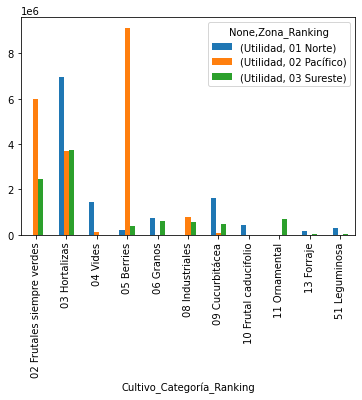

In [162]:
ResumenporCultyZona_SueloMx = SueloMx.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloMx_df = pd.DataFrame(ResumenporCultyZona_SueloMx.unstack(level = 1))
ResumenporCultyZona_SueloMx_df.plot(kind = 'bar')

In [163]:
ResumenporCultyZona_SueloMx2 = SueloMx.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloMx2.head(20)

,Utilidad
Cultivo_Categoría_Ranking,
02 Frutales siempre verdes,8.415044e+06
03 Hortalizas,1.437052e+07
04 Vides,1.518651e+06
05 Berries,9.715815e+06
06 Granos,1.328772e+06
08 Industriales,1.366460e+06
09 Cucurbitácea,2.170073e+06
10 Frutal caducifolio,4.346644e+05
11 Ornamental,6.792321e+05


# Raíz/Suelo en demás empresas


In [164]:
print ('${:,.3f} M'.format(SueloIntnl['Utilidad'].sum()/1000000) )

$29.754 M


<AxesSubplot:xlabel='Cultivo_Categoría_Ranking'>

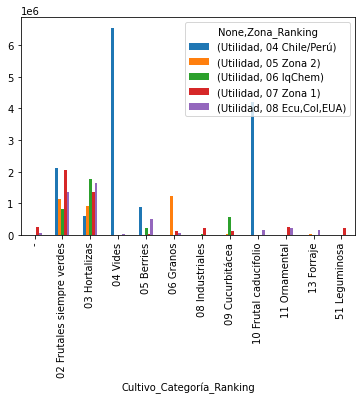

In [165]:
ResumenporCultyZona_SueloIntnl = SueloIntnl.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloIntnl_df = pd.DataFrame(ResumenporCultyZona_SueloIntnl.unstack(level = 1))
ResumenporCultyZona_SueloIntnl_df.plot(kind = 'bar')

In [166]:
ResumenporCultyZona_SueloIntnl2 = SueloIntnl.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloIntnl2.head(20)

,Utilidad
Cultivo_Categoría_Ranking,
-,2.833584e+05
02 Frutales siempre verdes,7.428955e+06
03 Hortalizas,6.296709e+06
04 Vides,6.590839e+06
05 Berries,1.613092e+06
06 Granos,1.402519e+06
08 Industriales,2.238674e+05
09 Cucurbitácea,7.027222e+05
10 Frutal caducifolio,4.362140e+06


# Top 10 en México

In [167]:
ResumenporCultyZona_SueloMx_detalle = SueloMx.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloIntnl_detalle = SueloIntnl.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloMx_detalle_sorted = ResumenporCultyZona_SueloMx_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_SueloMx_detalle_sorted.head(10)

Utilidad
Cultivo_Categoría       RM/ REIQ_x              
Berries                 AACSA       4.614181e+06
                        JF          4.520336e+06
Hortalizas              Quinval     3.495301e+06
Frutales siempre verdes AACSA       3.122935e+06
                        JF          2.853887e+06
Hortalizas              AACSA       2.217619e+06
Frutales siempre verdes Fv          1.771998e+06
Hortalizas              PromAgric   1.551698e+06
                        Dysea       1.484035e+06
Vides                   Ditecosa    1.417984e+06

In [168]:
print ('${:,.3f} M'.format(ResumenporCultyZona_SueloMx_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


$27.050 M


# Top 10 en otros países

In [169]:
ResumenporCultyZona_SueloIntnl_detalle_sorted = ResumenporCultyZona_SueloIntnl_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_SueloIntnl_detalle_sorted.head(10)

Utilidad
Cultivo_Categoría       RM/ REIQ_x                 
Frutal caducifolio      GMT            3.350554e+06
Vides                   Drokasa        3.237895e+06
                        GMT            1.763450e+06
Hortalizas              Duarte         1.351895e+06
Granos                  Empresas Melo  1.175925e+06
Frutales siempre verdes Guatemala      1.079303e+06
                        GMT            1.058070e+06
Hortalizas              Guatemala      1.014638e+06
Berries                 Drokasa        8.830623e+05
Vides                   Agrofuturo     8.582524e+05

In [170]:
print ('${:,.3f} M'.format(ResumenporCultyZona_SueloIntnl_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


$15.773 M


# Bioestimulante en México, 2022

In [171]:
print ('${:,.3f} M'.format(BioestMx['Utilidad'].sum()/1000000) )

$23.587 M


<AxesSubplot:xlabel='Cultivo_Categoría_Ranking'>

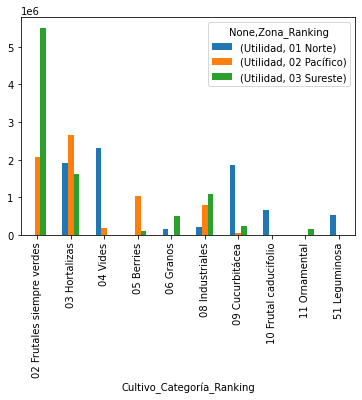

In [172]:
ResumenporCultyZona_BioestMx = BioestMx.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestMx_df = pd.DataFrame(ResumenporCultyZona_BioestMx.unstack(level = 1))
ResumenporCultyZona_BioestMx_df.plot(kind = 'bar')

In [173]:
ResumenporCultyZona_BioestMx2 = BioestMx.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestMx2.head(20)

,Utilidad
Cultivo_Categoría_Ranking,
02 Frutales siempre verdes,7.588391e+06
03 Hortalizas,6.177945e+06
04 Vides,2.499013e+06
05 Berries,1.135086e+06
06 Granos,6.403643e+05
08 Industriales,2.083501e+06
09 Cucurbitácea,2.134589e+06
10 Frutal caducifolio,6.452521e+05
11 Ornamental,1.586141e+05


# Bioestimulante en demás empresas


In [174]:
print ('${:,.3f} M'.format(BioestIntnl['Utilidad'].sum()/1000000) )

$17.740 M


<AxesSubplot:xlabel='Cultivo_Categoría_Ranking'>

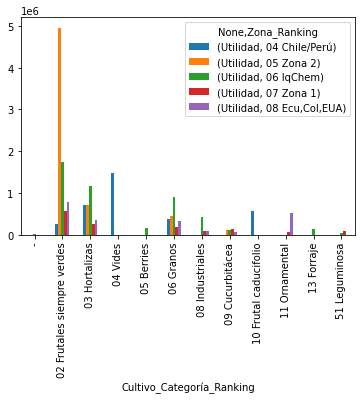

In [175]:
ResumenporCultyZona_BioestIntnl = BioestIntnl.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_Bioest_df = pd.DataFrame(ResumenporCultyZona_BioestIntnl.unstack(level = 1))
ResumenporCultyZona_Bioest_df.plot(kind = 'bar')

In [176]:
ResumenporCultyZona_BioestIntnl2 = BioestIntnl.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestIntnl2.head(20)

,Utilidad
Cultivo_Categoría_Ranking,
-,1.207833e+04
02 Frutales siempre verdes,8.286032e+06
03 Hortalizas,3.185726e+06
04 Vides,1.468943e+06
05 Berries,1.572464e+05
06 Granos,2.196328e+06
08 Industriales,6.187468e+05
09 Cucurbitácea,3.967090e+05
10 Frutal caducifolio,5.673964e+05


# Top 10 en México

In [177]:
ResumenporCultyZona_BioestMx_detalle = BioestMx.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestIntnl_detalle = BioestIntnl.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestMx_detalle_sorted = ResumenporCultyZona_BioestMx_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_BioestMx_detalle_sorted.head(10)

,,Utilidad
Cultivo_Categoría,RM/ REIQ_x,
Frutales siempre verdes,Fv,3.774870e+06
Vides,Ditecosa,2.315773e+06
Hortalizas,Ciba,2.108956e+06
Frutales siempre verdes,JF,1.491097e+06
Cucurbitácea,Ditecosa,1.133746e+06
Frutales siempre verdes,Serco Verde,1.088504e+06
Hortalizas,Quinval,1.035159e+06
Berries,JF,9.004271e+05
Hortalizas,Fv,6.516407e+05


In [178]:
print ('${:,.3f} M'.format(ResumenporCultyZona_BioestMx_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


$15.141 M


# Top 10 en otros países

In [179]:
ResumenporCultyZona_BioestIntnl_detalle_sorted = ResumenporCultyZona_BioestIntnl_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_BioestIntnl_detalle_sorted.head(10)

Utilidad
Cultivo_Categoría       RM/ REIQ_x                   
Frutales siempre verdes Agricola Piscis  4.171722e+06
                        Txao             1.362507e+06
Vides                   Agrofuturo       7.728887e+05
Frutales siempre verdes Empresas Melo    7.335164e+05
Vides                   Drokasa          5.562556e+05
Hortalizas              Bioscience       5.030567e+05
                        IA- JPM          4.553091e+05
Granos                  Agroasa          4.359739e+05
Frutales siempre verdes Agrica           4.145223e+05
Hortalizas              Agroasa          3.836570e+05

In [180]:
print ('${:,.3f} M'.format(ResumenporCultyZona_BioestIntnl_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


$9.789 M
